In [5]:
import numpy as np
import pandas as pd
import smbclient
import tempfile

import os
os.environ['SMB_SERVER_IP'] = 'homelab.matinm.dev'
os.environ['SMB_SERVER_PORT'] = '445'
os.environ['SMB_USERNAME'] = 'matin'
os.environ['SMB_PASSWORD'] = 'greenbird'
os.environ['SMB_SHARE_NAME'] = 'sambashare'

import os
smb_server_ip = os.environ['SMB_SERVER_IP']
smb_server_port = int(os.environ['SMB_SERVER_PORT'])
smb_username = os.environ['SMB_USERNAME']
smb_password = os.environ['SMB_PASSWORD']
smb_share_name = os.environ['SMB_SHARE_NAME']

# Set the SMB client configuration with the provided credentials
smbclient.ClientConfig(username=smb_username, password=smb_password)

def download_dataframe_from_smb_server(remote_file_path):
    # Create the full remote path
    remote_path = f"\\\\{smb_server_ip}\\{smb_share_name}\\{remote_file_path}"

    # Download the compressed CSV file from the SMB share
    with tempfile.NamedTemporaryFile(mode='w+b', suffix='.csv.gz', delete=False) as temp_file:
        with smbclient.open_file(remote_path, mode='rb') as remote_file:
            temp_file.write(remote_file.read())
        temp_file_path = temp_file.name

    # Load the temporary compressed CSV file into a pandas DataFrame
    df = pd.read_csv(temp_file_path, compression='gzip')

    # Delete the temporary file
    os.unlink(temp_file_path)

    return df

# Download term, bigram, trigram and 4 gram dataframes from the SMB share for both amazon and apple
apple_term_training = download_dataframe_from_smb_server('AppleTerm_reduced.csv.gz')
apple_2gram_training = download_dataframe_from_smb_server('AppleBigram_reduced.csv.gz')
apple_3gram_training = download_dataframe_from_smb_server('AppleTrigram_reduced.csv.gz')
apple_4gram_training = download_dataframe_from_smb_server('Apple4-gram_reduced.csv.gz')

In [12]:
# Term training data and labels
X_train_term = apple_term_training.iloc[:, :-1].values
y_train_term = apple_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = apple_2gram_training.iloc[:, :-1].values
y_train_2gram = apple_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = apple_3gram_training.iloc[:, :-1].values
y_train_3gram = apple_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = apple_4gram_training.iloc[:, :-1].values
y_train_4gram = apple_4gram_training.iloc[:, -1].values

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Average accuracy: 0.554 (+- 0.021)


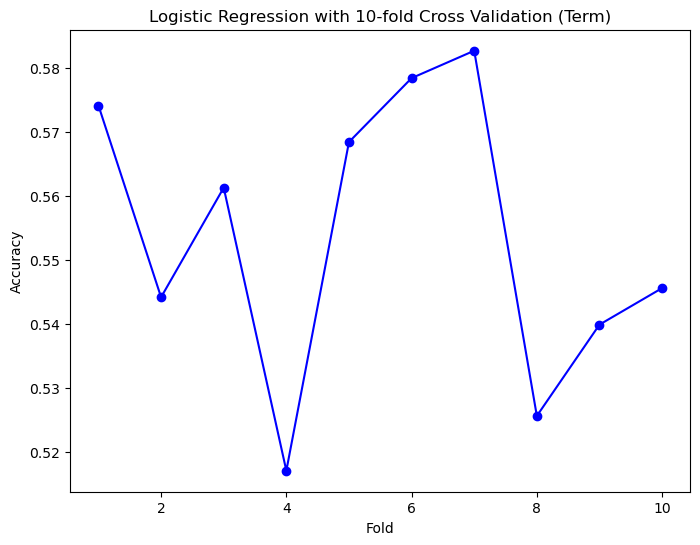

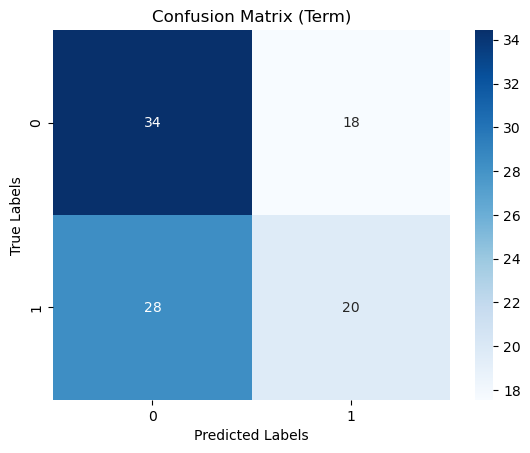

In [8]:
# model for term
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelTerm = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelTerm, X_train_term, y_train_term, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Term)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelTerm, X_train_term, y_train_term, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_term, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Term)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.560 (+- 0.027)


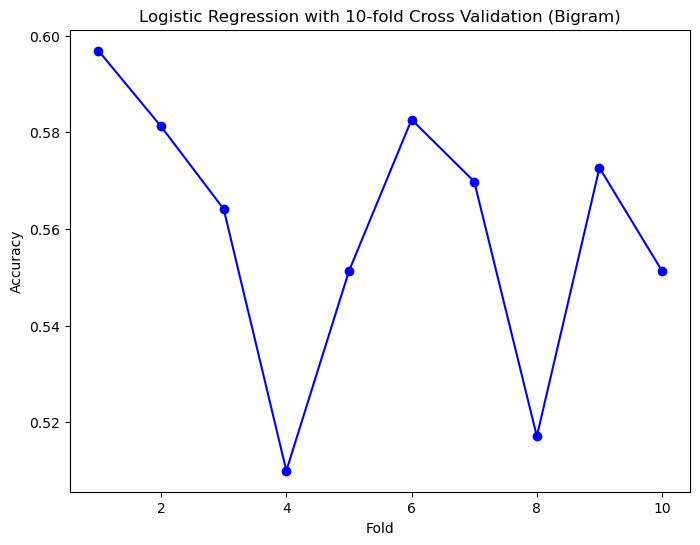

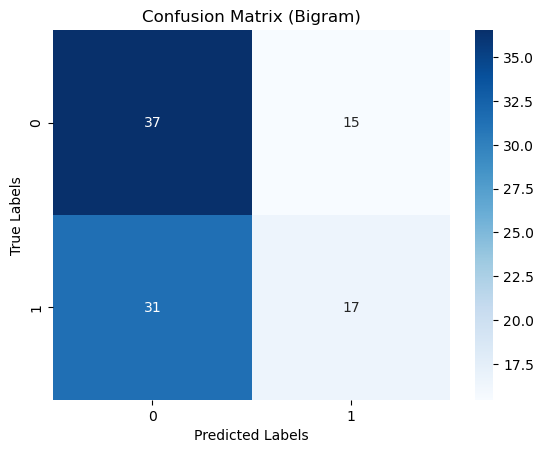

In [9]:
# model for bigram
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelBigram = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelBigram, X_train_2gram, y_train_2gram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
# data viz for accuracy
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Bigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelBigram, X_train_2gram, y_train_2gram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_2gram, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Bigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.541 (+- 0.013)


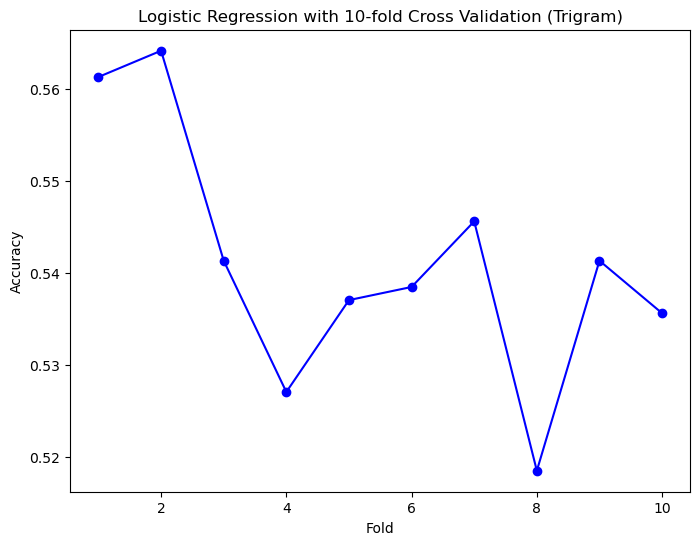

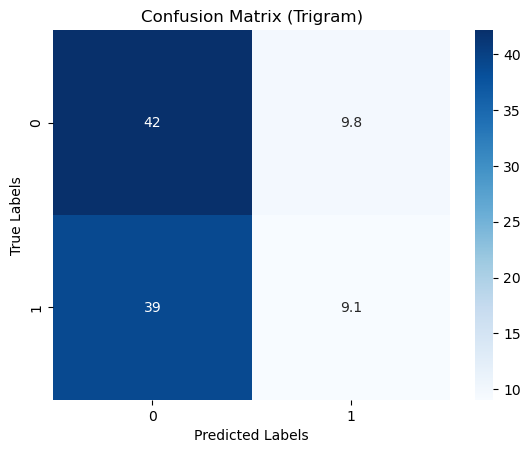

In [10]:
# model for 3gram
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelTerm = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelTerm, X_train_3gram, y_train_3gram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Trigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelTerm, X_train_3gram, y_train_3gram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_term, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Trigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.535 (+- 0.016)


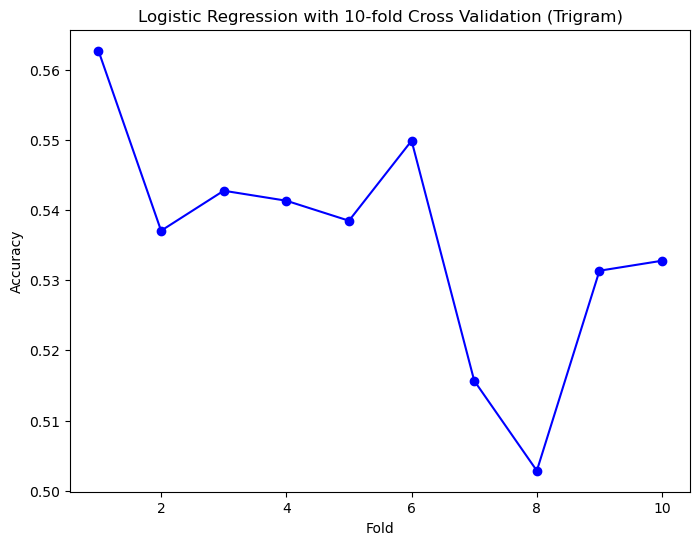

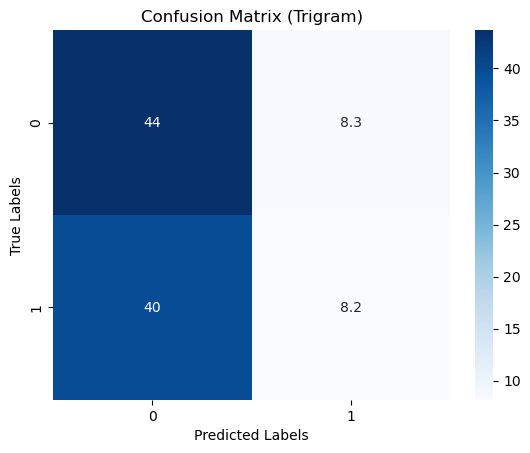

In [11]:
# model for 4-gram
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelTerm = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelTerm, X_train_4gram, y_train_4gram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Trigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelTerm, X_train_4gram, y_train_4gram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_term, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Trigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()